In [65]:
import requests
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #We need this to split the data
import numpy as np


# What is this project about?
This project is about prediction of co2 emission of different country around the world.
We are going to predict if each year co2 production is in accordance with europeen country co2 emission objectives guideline.
I choose this topic because global marming is becoming a big probleme for our society. Morever I wanted to see if countries around the world are doing things to lower their co2 production.
Is the co2 production around the world reducing each year like the europeen union want?



# Datasets
the first dataset is about the co2 production per year of differents countries around the world, from 1960 to 2020.
There are lots of different measurement based on different activities that produce co2
the second dataset is about the GDP per year of differents countries around the world, from 1960 to 2021

In [66]:
#we import the c02 dataset
C02 = pd.read_csv('c02_data.csv')
C02 = C02.drop(C02[C02["year"]<1960].index)
C02


,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
11,AFG,Afghanistan,1960,0.414,0.046,NaN,0.018,0.002,0.127,0.014,...,NaN,NaN,NaN,NaN,NaN,8996967.0,1.303325e+10,NaN,NaN,NaN
12,AFG,Afghanistan,1961,0.491,0.054,NaN,0.022,0.002,0.176,0.019,...,NaN,NaN,NaN,NaN,NaN,9169406.0,1.314629e+10,NaN,NaN,NaN
13,AFG,Afghanistan,1962,0.689,0.074,NaN,0.029,0.003,0.297,0.032,...,NaN,NaN,NaN,NaN,NaN,9351442.0,1.336763e+10,NaN,NaN,NaN
14,AFG,Afghanistan,1963,0.707,0.074,NaN,0.051,0.005,0.264,0.028,...,NaN,NaN,NaN,NaN,NaN,9543200.0,1.363030e+10,NaN,NaN,NaN
15,AFG,Afghanistan,1964,0.839,0.086,NaN,0.062,0.006,0.300,0.031,...,NaN,NaN,NaN,NaN,NaN,9744772.0,1.387050e+10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25984,ZWE,Zimbabwe,2016,10.738,0.765,1.415,0.639,0.046,6.959,0.496,...,2.076,11.50,0.820,6.21,0.443,14030338.0,2.096179e+10,46.666,3326.073,2.226
25985,ZWE,Zimbabwe,2017,9.582,0.673,1.666,0.678,0.048,5.665,0.398,...,2.023,11.62,0.816,6.35,0.446,14236599.0,2.194784e+10,45.936,3226.617,2.093
25986,ZWE,Zimbabwe,2018,11.854,0.821,1.308,0.697,0.048,7.101,0.492,...,2.173,11.96,0.828,6.59,0.456,14438812.0,2.271535e+10,47.502,3289.887,2.091
25987,ZWE,Zimbabwe,2019,10.949,0.748,1.473,0.697,0.048,6.020,0.411,...,NaN,NaN,NaN,NaN,NaN,14645473.0,NaN,49.427,3374.877,NaN


In [67]:
#we import the GDP dataset
gdp = pd.read_csv('GDP.csv')
gdp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.008272e+10,2.050945e+10,2.235043e+10,2.675866e+10,2.446499e+10,2.787894e+10,...,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11,NaN,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,...,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11,NaN,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.735731e+09,7.074658e+09,6.295820e+09,6.682833e+09,7.180813e+09,7.878509e+09,7.899879e+09,7.716925e+09,NaN,NaN
262,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.041524e+10,4.322859e+10,4.244510e+10,3.131737e+10,2.684013e+10,2.160614e+10,NaN,NaN,NaN,NaN
263,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575397e+09,7.972997e+09,8.497997e+09,9.423396e+09,1.037400e+10,1.133440e+10,...,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11,3.879346e+11,3.354421e+11,NaN,NaN
264,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10,1.811063e+10,NaN,NaN


# cleaning
Now that the datasets are imported we can clean them to get rid of useless columns and merge them together.
Do do that we are going to make sure that they have commons cells between the 2 datasets.

In [68]:
gdp=gdp.T
result=pd.DataFrame()
for x in range(len(gdp.columns)):
    #we save the iso_code of the country
    iso=gdp.iloc[1][x]
    #take the column of the country that we want (2 is the name if the only column of the data set)
    new=gdp[2].to_frame()
    #we fill an entire column of the iso code of the country to make the merging easier
    new = new.assign(Code=iso)
    #put back the index to something normal because when testing it's makes it simpler for me
    new = new.reset_index(level=0)
    #rename the column to understand better what need to be merged on what
    new=new.rename(columns={"index": "year", 2: "GDP", "Code":"iso_code"})
    #we get rid of the useless rows with the indicators name
    new=new.drop(new.index[:4])
    #we get rid of the rows corresponding to year that aren't present on the co2 file
    new=new.drop(new.index[-2:])
    #put all variable on the same type
    C02["year"] = C02["year"].astype(str).astype(int)
    new["year"] = new["year"].astype(str).astype(int)
    #we concatenate the result of the merging between the c02 statistics and the gdp of the same year in the same country
    result=pd.concat([result,pd.merge(C02[C02["iso_code"]==iso], new, on=["year", "iso_code"])], axis=0, ignore_index=True)
result['objectif']=0
result


,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp,GDP,objectif
0,ABW,Aruba,1960,0.619,11.411,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,54208.0,NaN,NaN,NaN,NaN,537777811.111111,0
1,ABW,Aruba,1961,0.646,11.645,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,55434.0,NaN,NaN,NaN,NaN,548888895.555556,0
2,ABW,Aruba,1962,0.709,12.607,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,56234.0,NaN,NaN,NaN,NaN,546666677.777778,0
3,ABW,Aruba,1963,0.679,11.977,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,56699.0,NaN,NaN,NaN,NaN,751111191.111111,0
4,ABW,Aruba,1964,0.660,11.578,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,57029.0,NaN,NaN,NaN,NaN,800000044.444444,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,ZWE,Zimbabwe,2016,10.738,0.765,1.415,0.639,0.046,6.959,0.496,...,0.820,6.21,0.443,14030338.0,2.096179e+10,46.666,3326.073,2.226,18116562464.908798,0
12039,ZWE,Zimbabwe,2017,9.582,0.673,1.666,0.678,0.048,5.665,0.398,...,0.816,6.35,0.446,14236599.0,2.194784e+10,45.936,3226.617,2.093,18753469630.258598,0
12040,ZWE,Zimbabwe,2018,11.854,0.821,1.308,0.697,0.048,7.101,0.492,...,0.828,6.59,0.456,14438812.0,2.271535e+10,47.502,3289.887,2.091,18053228578.887798,0
12041,ZWE,Zimbabwe,2019,10.949,0.748,1.473,0.697,0.048,6.020,0.411,...,NaN,NaN,NaN,14645473.0,NaN,49.427,3374.877,NaN,18799450742.782299,0


Most of the cleaning is done, now we're going to calculate how much the co2 emission change from one year to the other
From what i could find on the internet most europeen country want to reduce their co2 emmision by 40% from 2015 and 2030
So we are going to see if the emission is reduced by at leats 2.5% each year


In [69]:
for x in range(1, len(result)):
    if ((result.iloc[x,3]*100/result.iloc[x-1,3])-100) < -2.5 :
        result.iloc[x,61]= 1
    else:
        result.iloc[x,61]= 0
result

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp,GDP,objectif
0,ABW,Aruba,1960,0.619,11.411,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,54208.0,NaN,NaN,NaN,NaN,537777811.111111,0
1,ABW,Aruba,1961,0.646,11.645,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,55434.0,NaN,NaN,NaN,NaN,548888895.555556,0
2,ABW,Aruba,1962,0.709,12.607,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,56234.0,NaN,NaN,NaN,NaN,546666677.777778,0
3,ABW,Aruba,1963,0.679,11.977,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,56699.0,NaN,NaN,NaN,NaN,751111191.111111,1
4,ABW,Aruba,1964,0.660,11.578,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,57029.0,NaN,NaN,NaN,NaN,800000044.444444,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,ZWE,Zimbabwe,2016,10.738,0.765,1.415,0.639,0.046,6.959,0.496,...,0.820,6.21,0.443,14030338.0,2.096179e+10,46.666,3326.073,2.226,18116562464.908798,1
12039,ZWE,Zimbabwe,2017,9.582,0.673,1.666,0.678,0.048,5.665,0.398,...,0.816,6.35,0.446,14236599.0,2.194784e+10,45.936,3226.617,2.093,18753469630.258598,1
12040,ZWE,Zimbabwe,2018,11.854,0.821,1.308,0.697,0.048,7.101,0.492,...,0.828,6.59,0.456,14438812.0,2.271535e+10,47.502,3289.887,2.091,18053228578.887798,0
12041,ZWE,Zimbabwe,2019,10.949,0.748,1.473,0.697,0.048,6.020,0.411,...,NaN,NaN,NaN,14645473.0,NaN,49.427,3374.877,NaN,18799450742.782299,1


# Data analysis
we're going to select which data are the most relevant to the research question
In order to have good result we are going to take the per capita data, because that way there is one less differences between the data from all the countries

Since we are going to do a knn model, we need to drop all NaN
then we'll see how much year are in line with the objectif are less after the cleaning

In [70]:
result['GDP']=result['GDP'].astype('float64')
cleanned=result[['objectif','co2_per_capita','coal_co2_per_capita','gas_co2_per_capita','energy_per_capita','consumption_co2_per_capita','GDP']].dropna()
cleanned['objectif'].value_counts()

0    1041
1     338
Name: objectif, dtype: int64

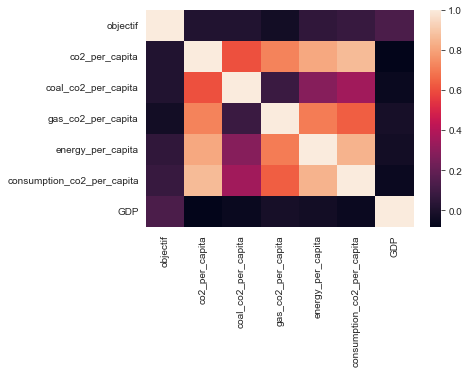

In [71]:
corr =cleanned.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

we can see that there is a strong and moderate correlation between the co2 variable but a weak one with the GDP

# Building the model and evaluating
we're going to split the merged dataframe, one part will be used to train the model and the other part will be used to test the model.
Once the model created we'll also evaluate it based on accuracy precision and recall.
And finally we're going to see if the model is good at predicting the 2.5% co2 production reduction per year.

In [72]:
from sklearn.preprocessing import normalize
#create the X matrix
X = cleanned.loc[:, 'co2_per_capita':'GDP']
#normalize the matrix to put everything on the same scale
X = normalize(X)
y = cleanned['objectif']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(X_train, y_train)
#calculate the fit on the test data
knn.score(X_test, y_test)

0.7077294685990339

In [74]:
from sklearn.metrics import confusion_matrix
#the predicted values
y_test_pred = knn.predict(X_test)
#creates a confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
#In order to read it easily , let's make a dataframe out of it, and add labels to it.
conf_matrix = pd.DataFrame(cm, index=['objectif failed', 'objectif succeeded'], columns = ['objectif failed_p', 'objectif succeeded_p'])
conf_matrix

,objectif failed_p,objectif succeeded_p
objectif failed,282,32
objectif succeeded,89,11


With the regular 5 neighbors the model is pretty accurate
But with just the confusion matrix we can see that the model is way better at predicting the failed objectives than the succeeded one

### Precision
We'll calculate the precision for both outcome to highlight the differences between the prediction outcome


In [75]:
from operator import truediv
import numpy as np

tp = np.diag(cm)
prec = list(map(truediv, tp, np.sum(cm, axis=0)))
rec = list(map(truediv, tp, np.sum(cm, axis=1)))
print ('Precision: {}\nRecall: {}'.format(prec, rec))

Precision: [0.7601078167115903, 0.2558139534883721]
Recall: [0.8980891719745223, 0.11]


as we can see the precision and recall is really good for the failed objectif outcome.
The model can predict failed objectif with 76% precision, but predicted the succes with only 25.5%
The model recall 89.8% of the failed objectifs but only 11% of the succeeded objectifs.

To sum it up we can say that this model is better at predicting the failure outcome.

# Searching for the most accurate model
Now that we've done the basic knn model with 5 neighbors and no special parameters, it's time to try to fine tune it to create a better model.

We'll look for the most optimal k to use for the knn model
To do that we need to calculate all models for different k value and then calculate the number of error and the accuracy

Text(0, 0.5, 'Accuracy')

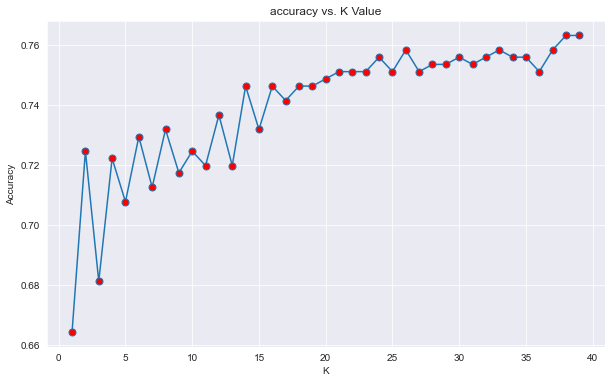

In [76]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,marker='o',markerfacecolor='red', markersize=7)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

As we can see on the graph, the best value of k for the accuracy is 38

Text(0, 0.5, 'precision')

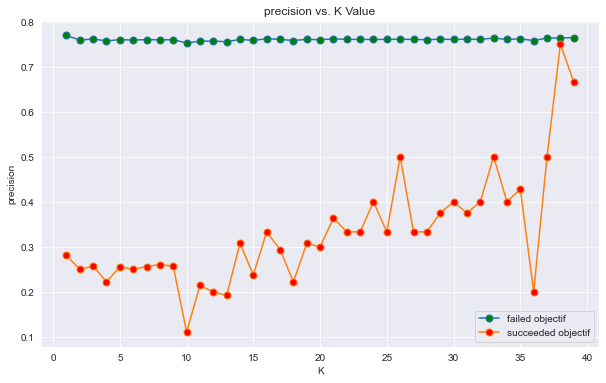

In [77]:
prec = []

for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    cm = confusion_matrix(y_test, yhat)
    tp = np.diag(cm)
    l=list(map(truediv, tp, np.sum(cm, axis=0)))
    prec.append(l)
df = pd.DataFrame(prec)
plt.figure(figsize=(10,6))
plt.plot(range(1,40),df[0],marker='o',markerfacecolor='green', markersize=7, label="failed objectif")
plt.plot(range(1,40),df[1],marker='o',markerfacecolor='red', markersize=7, label="succeeded objectif")
plt.legend(loc="lower right")
plt.title('precision vs. K Value')
plt.xlabel('K')
plt.ylabel('precision')


The same can be said about the precision

Text(0, 0.5, 'recall')

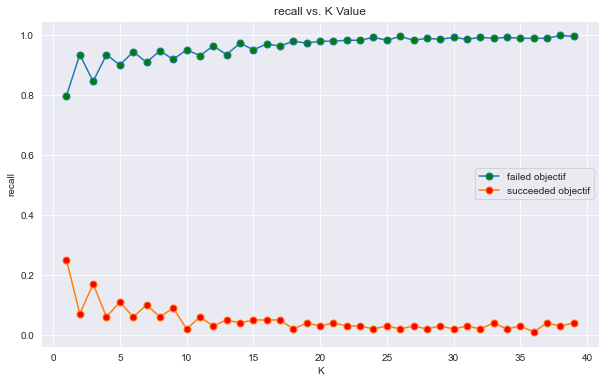

In [78]:
recall = []

for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    cm = confusion_matrix(y_test, yhat)
    tp = np.diag(cm)
    l=list(map(truediv, tp, np.sum(cm, axis=1)))
    recall.append(l)
df = pd.DataFrame(recall)
plt.figure(figsize=(10,6))
plt.plot(range(1,40),df[0],marker='o',markerfacecolor='green', markersize=7, label="failed objectif")
plt.plot(range(1,40),df[1],marker='o',markerfacecolor='red', markersize=7, label="succeeded objectif")
plt.legend(loc="center right")
plt.title('recall vs. K Value')
plt.xlabel('K')
plt.ylabel('recall')


Unfortunatly it seems that with the data used for the model it's impossible to have a good recall for both outcomes.
So we are going to select the k value based on the precision and accuracy and see what happen.

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
knn = KNeighborsClassifier(n_neighbors=38)
knn = knn.fit(X_train, y_train)
#calculate the fit on the test data
knn.score(X_test, y_test)

0.7632850241545893

In [92]:
from sklearn.metrics import confusion_matrix
#the predicted values
y_test_pred = knn.predict(X_test)
#creates a confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
#In order to read it easily , let's make a dataframe out of it, and add labels to it.
conf_matrix = pd.DataFrame(cm, index=['objectif failed', 'objectif succeeded'], columns = ['objectif failed_p', 'objectif succeeded_p'])
conf_matrix

,objectif failed_p,objectif succeeded_p
objectif failed,313,1
objectif succeeded,97,3


Compared to the first model this one is even better when it comes to predicting failed objectives but is even worst when it comes to predicting objectives succeeded.

# sources
GDP (current US$) | Data. (n.d.). Worldbank. Retrieved May 13, 2022, from https://data.worldbank.org/indicator/NY.GDP.MKTP.CD
Ritchie, H. (2020, May 11). CO2 emissions. Our World in Data. Retrieved February 13, 2022, from https://ourworldindata.org/co2-emissions